In [11]:
import seaborn as sns
from scipy.optimize import linprog
from scipy.stats import kurtosis, skew
import os 
from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *
from null_elections import *
import random

In [ ]:
#winners = pd.DataFrame(columns=["filename", "diff", "interval gamma", "#candidates","IRV1", "Condorcet1", "Plurality1", "Approval1" "IRV2", "Condorcet2", "Plurality2", "Approval2"])
directory = "dataverse_files"
count = 0
for filename in os.listdir(directory):
    df = pd.DataFrame(columns=['candidate', 'position', 'first place count', 'first place freq'])
    count += 1
    if (count % 10 == 0):
        print(count, " ", filename)
        print(df)
    try:
        csv =  os.path.join(directory, filename)
        total = 0
        ballots, candidates = parse_election_data(csv)
        df['candidate'] = candidates
        df['first place count'] = [-1 for candidate in candidates]
        df['first place freq'] = [-1 for candidate in candidates]
        for i in range (len(candidates)):
            df['len_' + str(i+1)] = [-1 for candidate in candidates]

        for b in ballots:
            if len(b) > 0:
                first_place = b[0]
                total += ballots[b]
                #print(df.loc[df['candidate']==first_place, 'len_1'].values)
                if df.loc[df['candidate']==first_place, 'first place count'].values[0] == -1:
                    df.loc[df['candidate']==first_place, 'first place count'] = 0
                df.loc[df['candidate']==first_place, 'first place count'] += ballots[b]
                length = len(b)
                if (length > 0):
                    if df.loc[df['candidate']==first_place, 'len_'+str(length)].values[0] == -1:
                        df.loc[df['candidate']==first_place, 'len_'+str(length)] = 0
                    df.loc[df['candidate']==first_place, 'len_'+str(length)] += ballots[b]

        # Perform the RCV analysis
        test = perform_rcv_analysis(csv, n_runs=1000)
        mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

        # Print the normalized distances between candidates and plot the MDS analysis
        normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
        for c in candidates:
            df.loc[df['candidate']==c, 'position'] = normalized_distances[c]
            df.loc[df['candidate']==c, 'first place freq'] = df.loc[df['candidate']==c, 'first place count']/total
        df.to_csv(os.path.join("null_elections", filename))
        if (count % 10 == 0):
            print(count, " ", filename)
            print(df)
    except:
        print(filename, " threw an exception")


In [ ]:
csv = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"
ballots, candidates = parse_election_data(csv)
df = pd.DataFrame(columns=['candidate', 'position', 'first place count', 'fist place freq'])
df['candidate'] = candidates
for i in range (len(candidates)):
    df['len_' + str(i+1)] = [None for candidate in candidates]
print(df)

In [ ]:
#df = pd.DataFrame(columns=['candidate', 'position'])
df['candidate'] = candidates

for i in range (len(candidates)):
    df['len_' + str(i+1)] = [-1 for candidate in candidates]
total = 0
for b in ballots:
    if len(b) > 0:
        #print(b)
        total += ballots[b]
        first_place = b[0]
        #print(df.loc[df['candidate']==first_place, 'len_1'].values)
        if df.loc[df['candidate']==first_place, 'len_1'].values[0] == -1:
            df.loc[df['candidate']==first_place, 'len_1'] = 0
        df.loc[df['candidate']==first_place, 'len_1'] += ballots[b]
        length = len(b)
        if (length > 1):
            if df.loc[df['candidate']==first_place, 'len_'+str(length)].values[0] == -1:
                df.loc[df['candidate']==first_place, 'len_'+str(length)] = 0
            df.loc[df['candidate']==first_place, 'len_'+str(length)] += ballots[b]
print(df)
print(total)

In [ ]:
filename = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"
df = pd.DataFrame(columns=['candidate', 'position', 'first place count', 'first place freq'])


#csv =  os.path.join(directory, filename)
total = 0
ballots, candidates = parse_election_data(csv)
df['candidate'] = candidates
df['first place count'] = [-1 for candidate in candidates]
df['first place freq'] = [-1 for candidate in candidates]
for i in range (len(candidates)):
    df['len_' + str(i+1)] = [-1 for candidate in candidates]

for b in ballots:
    if len(b) > 0:
        first_place = b[0]
        total += ballots[b]
        #print(df.loc[df['candidate']==first_place, 'len_1'].values)
        if df.loc[df['candidate']==first_place, 'first place count'].values[0] == -1:
            df.loc[df['candidate']==first_place, 'first place count'] = 0
        df.loc[df['candidate']==first_place, 'first place count'] += ballots[b]
        length = len(b)
        if (length > 0):
            if df.loc[df['candidate']==first_place, 'len_'+str(length)].values[0] == -1:
                df.loc[df['candidate']==first_place, 'len_'+str(length)] = 0
            df.loc[df['candidate']==first_place, 'len_'+str(length)] += ballots[b]

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
for c in candidates:
    df.loc[df['candidate']==c, 'position'] = normalized_distances[c]
    df.loc[df['candidate']==c, 'first place freq'] = df.loc[df['candidate']==c, 'first place count']/total
#df.to_csv(os.path.join("null_elections", filename))
print(df)



In [ ]:
df = pd.read_csv("null_elections/Maine_11062018_CongressionalDistrict2.csv")
print(df)

In [ ]:
ballots = {}
candidates = df['candidate'].values


for c in candidates:
    ballots[(c,)] = df.loc[df['candidate']==c, 'len_1'].values[0]
    b = (c,)
    #print("candidate: ", c, ballots)
    for i in range(2, len(candidates) + 1):
        if df.loc[df['candidate']==c, 'len_'+str(i)].values[0] != -1:
            count_i = df.loc[df['candidate']==c, 'len_'+str(i)].values[0]
            
            while(len(b) < i):
                random_candidate = random.choice(candidates)
                if random_candidate not in b:
                    b += (random_candidate,)
           # print("len_"+str(i), ": ", b)
            ballots[b] = count_i
print(ballots)
print(df)


In [3]:
def calculate_intervals(numbers):
    midpoints = []
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            midpoints.append((numbers[i] + numbers[j])/2)

    intervals = []
    midpoints = sorted(midpoints)
    for i in range(len(midpoints)):
        for j in range(i + 1, len(midpoints)):
            intervals.append((midpoints[i], midpoints[j]))
    return midpoints, intervals

In [4]:
def ballot_to_num(ballot, normalized_distances):
    b_num = []
    for c in ballot:
        b_num.append(normalized_distances[c])
    return b_num

In [6]:
def solve_lp(b_num, midpoints, intervals, n):
    
    obj = [1]
    lhs_ineq = []
    rhs_ineq = []
    e = 0.000000001
    for i in range(len(b_num)):
        for j in range(i + 1, len(b_num)):
            mid = (b_num[i]+b_num[j])/2
            if (b_num[i] > b_num[j]):
                lhs_ineq.append([-1])
                rhs_ineq.append(-(e+mid))
            if (b_num[i] < b_num[j]):
                lhs_ineq.append([1])
                rhs_ineq.append(e+mid)
    bnd = [0, n-1]
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,
              method="revised simplex")
    return (opt["success"] is True)
        

    

In [8]:
def get_interval_consistent_ballots(ballots, normalized_distances):
    """
    Args:
        ballots: a dictionary of ballots paired with the number of voters voting fo that ranking.
        normalized_distances: 
    Return:
        consistent_ballots: a dictionary of all consistent ballots.
        gamma: the fraction of the consistent ballots.
        
    """
    midpoints, intervals = calculate_intervals(list(normalized_distances.values()))

    total = 0
    consistent = 0
    consistent_ballots = {}
    for b in ballots:
        if (len(b) != 0):
            total += ballots[b]
            if (len(b) <= 2):
                consistent += ballots[b]
                consistent_ballots[b] = ballots[b]
            else:
                b_num = ballot_to_num(b, normalized_distances)
                lp = solve_lp(b_num, midpoints, intervals, len(normalized_distances))
                if (lp):
                    consistent_ballots[b] = ballots[b]
                    consistent += ballots[b]
    
    gamma = consistent/total
    return consistent_ballots, gamma
        

In [ ]:
normalized_distances = {}
for c in candidates:
    position = df.loc[df['candidate']==c, 'position']
    normalized_distances[c] = position.values[0]
print(normalized_distances)
consistent_ballots, gamma = get_interval_consistent_ballots(ballots, normalized_distances)

In [ ]:
print(gamma)

In [ ]:
from null_elections import *
from interval_consistency import *

In [12]:
filename = "Maine_11062018_CongressionalDistrict2.csv"
runs = 1000
sum_gamma = 0
for i in range(runs):
    gamma = get_null_gamma(filename)[1]
    sum_gamma += gamma

print(sum_gamma/1000)

0.7273844162826689


In [ ]:
strict = pd.read_csv("strict.csv")
permissive = pd.read_csv("permissive.csv")
filename = "Maine_11062018_CongressionalDistrict2.csv"
strict_gamma = strict.loc[strict['filename']==filename, 'gamma']
permissive_gamma = permissive.loc[permissive['filename']==filename, 'gamma']
print(strict_gamma.values[0])
print(permissive_gamma.values[0])

In [13]:
#winners = pd.DataFrame(columns=["filename", "diff", "interval gamma", "#candidates","IRV1", "Condorcet1", "Plurality1", "Approval1" "IRV2", "Condorcet2", "Plurality2", "Approval2"])
directory = "dataverse_files"
count = 0
df = pd.DataFrame(columns=["filename", "null_gamma", "permissive_gamma", "strict_gamma"])
strict = pd.read_csv("strict.csv")
permissive = pd.read_csv("permissive.csv")
for filename in os.listdir(directory):
    try:
        strict_gamma = strict.loc[strict['filename']==filename, 'gamma'].values[0]
        permissive_gamma = permissive.loc[permissive['filename']==filename, 'gamma'].values[0]
        runs = 100
        sum_gamma = 0
        for i in range(runs):
            gamma = get_null_gamma(filename)[1]
            sum_gamma += gamma
        null_gamma = sum_gamma/runs
        new_row = {'filename': filename, 'null_gamma': null_gamma, 'permissive_gamma': permissive_gamma, 'strict_gamma': strict_gamma}
        df = df.append(new_row, ignore_index=True)

    except:
        print(filename, " threw an exception")


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Alaska_11082022_HouseDistrict3.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Alaska_11082022_HouseDistrict33.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Alaska_11082022_HouseDistrict37.csv  threw an exception
Alaska_11082022_HouseDistrict38.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Alaska_11082022_HouseDistrict40.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Alaska_11082022_HouseDistrict8.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Alaska_11082022_SenateDistrictB.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Albany_11082022_FAKECityCouncil.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Berkeley_11022010_CityAuditor.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Berkeley_11042014_CityAuditor.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Burlington_03072023_CityCouncilNorthDistrict.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Maine_06122018_DemocraticPrimaryforGovernor.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Minneapolis_11022021_ParkBoardDistrict1.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Minneapolis_11062009_PRBoardDistrict4.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Minneapolis_11072017_Mayor.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Minneapolis_11072017_Ward2CityCouncil.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Oakland_11022010_SchoolDirectorDistrict2.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Oakland_11022010_SchoolDirectorDistrict6.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Oakland_11062018_SchoolDirectorDistrict2.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Oakland_11082016_CityAttorney.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Oakland_11082022_CityAuditor.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

Portland_06142022_SchoolboardAL.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Portland_06142022_Schoolboarddistrict5.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

SanFrancisco_11052019_CityAttorney.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


SanFrancisco_11052019_PublicDefender.csv  threw an exception
SanFrancisco_11052019_Sheriff.csv  threw an exception
SanFrancisco_11052019_Treasurer.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

SanFrancisco_11062018_PublicDefender.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

SanFrancisco_11082022_AssessorRecorder.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


SanFrancisco_11082022_BoardofSupervisorsD2.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

SanLeandro_11022010_CountyCouncilDistrict3.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


SanLeandro_11032020_MemberCityCouncilDist6SanLeandroRCV.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

SanLeandro_11082016_CountyCouncilDistrict4.csv  threw an exception
SanLeandro_11082016_CountyCouncilDistrict6.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

StLouisPark_11022021_CityCouncilWard1.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


StLouisPark_11022021_CityCouncilWard4.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


TakomaPark_11082022_CityCouncilWard2.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


TakomaPark_11082022_CityCouncilWard4.csv  threw an exception


C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\AppData\Local\Temp\ipykernel_19920\3161752069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mahsh\A

In [ ]:
print(df)

In [14]:
df.to_csv("gamma_table.csv")

In [19]:
df = pd.read_csv("gamma_table.csv")

files = df["filename"].values
for file in files:
    data = pd.read_csv(os.path.join("null_elections", file))
    candidates = data["candidate"].values
    df.loc[df["filename"] == file, "#candidates"] = len(candidates)

df.to_csv("gamma_table2.csv")
                       

In [20]:
import pandas as pd
from scipy.stats import ttest_rel

# Step 1: Read the CSV file
file_path = "gamma_table.csv"
data = pd.read_csv(file_path)

# Step 2: Group by number of candidates
groups = data.groupby('#candidates')

# Step 3 & 4: Perform paired t-test and collect results
results = []

for name, group in groups:
    gamma1 = group['null_gamma']
    gamma2 = group['permissive_gamma']
    t_statistic, p_value = ttest_rel(gamma1, gamma2)
    results.append({
        '# of candidates': name,
        't-statistic': t_statistic,
        'p-value': p_value
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print or save results
print(results_df)


    # of candidates  t-statistic       p-value
0               2.0          NaN           NaN
1               3.0   -11.202536  2.332150e-19
2               4.0    -5.675843  2.996355e-07
3               5.0    -3.273072  2.310378e-03
4               6.0     0.321348  7.511233e-01
5               7.0    -1.406200  1.750120e-01
6               8.0    -1.501066  1.555523e-01
7               9.0     0.212776  8.375655e-01
8              10.0    -0.967499  3.777299e-01
9              11.0     1.013899  3.571532e-01
10             12.0    -1.578187  1.896624e-01
11             13.0     0.004712  9.966680e-01
12             14.0          NaN           NaN
13             15.0          NaN           NaN
14             16.0    -4.119041  1.516219e-01
15             18.0          NaN           NaN
16             21.0          NaN           NaN
17             22.0          NaN           NaN
18             35.0          NaN           NaN
19             66.0          NaN           NaN


c:\Users\mahsh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\mahsh\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


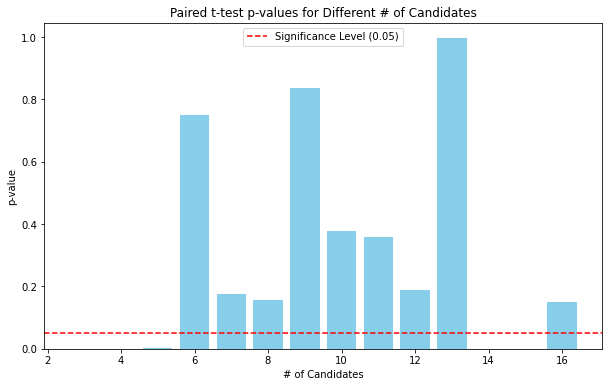

In [21]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results_df['# of candidates'], results_df['p-value'], color='skyblue')
plt.xlabel('# of Candidates')
plt.ylabel('p-value')
plt.title('Paired t-test p-values for Different # of Candidates')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()


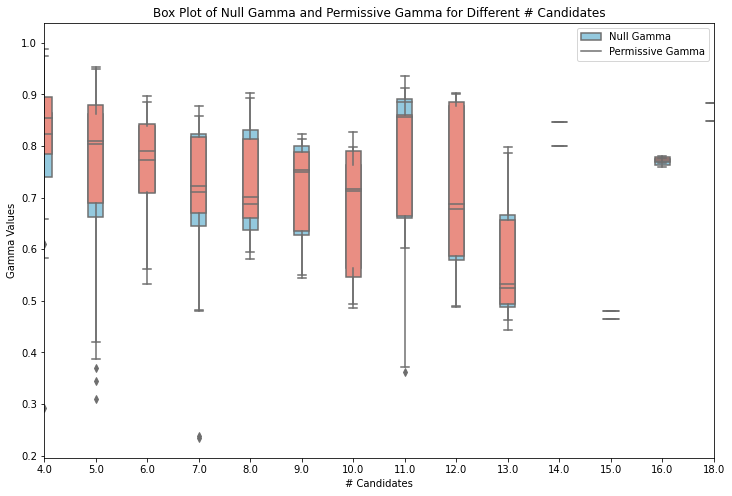

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['#candidates'], y=data['null_gamma'], color='skyblue', width=0.3, fliersize=5)
sns.boxplot(x=data['#candidates'], y=data['permissive_gamma'], color='salmon', width=0.3, fliersize=5)
plt.xlabel('# Candidates')
plt.ylabel('Gamma Values')
plt.title('Box Plot of Null Gamma and Permissive Gamma for Different # Candidates')
plt.legend(labels=['Null Gamma', 'Permissive Gamma'])
plt.xlim(2, 15)
plt.show()


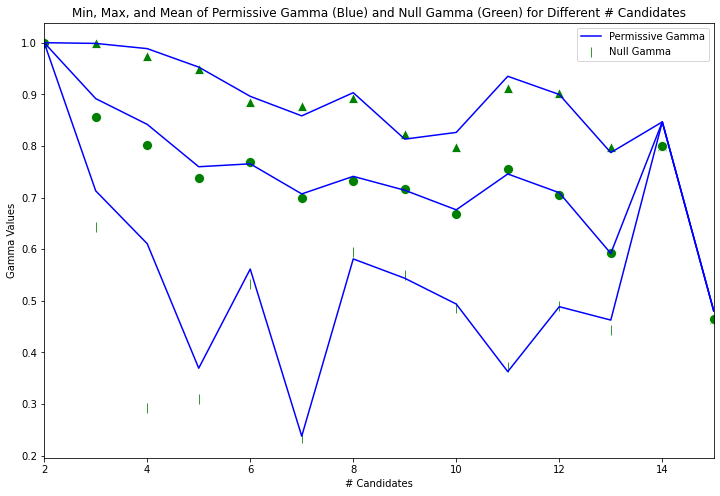

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate min, max, and mean values for each # of candidates for permissive_gamma
permissive_summary_data = data.groupby('#candidates')['permissive_gamma'].agg(['min', 'max', 'mean']).reset_index()

# Calculate min, max, and mean values for each # of candidates for null_gamma
null_summary_data = data.groupby('#candidates')['null_gamma'].agg(['min', 'max', 'mean']).reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot min, max, and mean for permissive_gamma
sns.lineplot(x='#candidates', y='min', data=permissive_summary_data, color='blue', label='Permissive Gamma', marker=None)
sns.lineplot(x='#candidates', y='max', data=permissive_summary_data, color='blue', marker=None)
sns.lineplot(x='#candidates', y='mean', data=permissive_summary_data, color='blue', marker=None)

# Plot min, max, and mean for null_gamma
sns.scatterplot(x='#candidates', y='min', data=null_summary_data, color='green', label='Null Gamma', marker='|', s=100)
sns.scatterplot(x='#candidates', y='max', data=null_summary_data, color='green', marker='^', s=100)
sns.scatterplot(x='#candidates', y='mean', data=null_summary_data, color='green', marker='o', s=100)

plt.xlabel('# Candidates')
plt.ylabel('Gamma Values')
plt.title('Min, Max, and Mean of Permissive Gamma (Blue) and Null Gamma (Green) for Different # Candidates')
plt.legend()
plt.xlim(2, 15)
plt.show()
